# Demo of loading the data from Zarr

In [1]:
import iris
import os
import sys
import logging
import xarray as xr
import numpy as np

import crd_utils as crd
import umdates_utils as um

from datetime import datetime, timedelta

In [2]:
ZARR = '/data/cssp-china/zarr_daily_1851-1859'

## Loading data to Xarray take milliseconds

In [3]:
%%time
ds_z = xr.open_zarr(ZARR)
ds_z

CPU times: user 104 ms, sys: 42.9 ms, total: 147 ms
Wall time: 6.15 s


<xarray.Dataset>
Dimensions:                                    (grid_latitude: 219, grid_latitude_1: 218, grid_longitude: 286, grid_longitude_1: 286, pressure: 14, time: 3244)
Coordinates:
    forecast_period                            (time) timedelta64[ns] dask.array<chunksize=(204,), meta=np.ndarray>
    forecast_reference_time                    datetime64[ns] ...
  * grid_latitude                              (grid_latitude) float32 22.88 ... -25.08
  * grid_latitude_1                            (grid_latitude_1) float32 22.77 ... -24.969997
  * grid_longitude                             (grid_longitude) float32 323.48 ... 386.18002
  * grid_longitude_1                           (grid_longitude_1) float32 323.59003 ... 386.29004
    height                                     float64 ...
    height_1                                   float64 ...
  * pressure                                   (pressure) float32 10.0 ... 1000.0
  * time                                       (time) datetime64[ns] 1851-01-01T12:00:00 ... 1859-12-28T12:00:00
Data variables:
    air_pressure_at_sea_level                  (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(200, 219, 286), meta=np.ndarray>
    air_temperature_at_2m_max                  (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(200, 219, 286), meta=np.ndarray>
    air_temperature_at_2m_mean                 (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(200, 219, 286), meta=np.ndarray>
    air_temperature_at_2m_min                  (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(200, 219, 286), meta=np.ndarray>
    air_temperature_at_pressure_mean           (time, pressure, grid_latitude, grid_longitude) float32 dask.array<chunksize=(200, 1, 219, 286), meta=np.ndarray>
    cloud_area_fraction                        (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(200, 219, 286), meta=np.ndarray>
    geopotential_height                        (time, pressure, grid_latitude, grid_longitude) float32 dask.array<chunksize=(200, 1, 219, 286), meta=np.ndarray>
    m01s05i217_max                             (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(200, 219, 286), meta=np.ndarray>
    precipitation_flux                         (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(200, 219, 286), meta=np.ndarray>
    relative_humidity_at_2m_max                (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(200, 219, 286), meta=np.ndarray>
    relative_humidity_at_2m_mean               (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(200, 219, 286), meta=np.ndarray>
    relative_humidity_at_2m_min                (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(200, 219, 286), meta=np.ndarray>
    relative_humidity_at_pressure_mean         (time, pressure, grid_latitude, grid_longitude) float32 dask.array<chunksize=(200, 1, 219, 286), meta=np.ndarray>
    specific_humidity                          (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(200, 219, 286), meta=np.ndarray>
    surface_air_pressure                       (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(200, 219, 286), meta=np.ndarray>
    surface_downwelling_longwave_flux_in_air   (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(200, 219, 286), meta=np.ndarray>
    surface_downwelling_shortwave_flux_in_air  (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(200, 219, 286), meta=np.ndarray>
    surface_temperature_max                    (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(200, 219, 286), meta=np.ndarray>
    surface_temperature_mean                   (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(200, 219, 286), meta=np.ndarray>
    surface_temperature_min                    (time, grid_latitude, grid_l

## Converting one of the data variables to an Iris cube also takes milliseconds

In [4]:
%%time
cube = ds_z.relative_humidity_at_pressure_mean.to_iris()
cube

CPU times: user 180 ms, sys: 34.3 ms, total: 214 ms
Wall time: 414 ms


<iris 'Cube' of relative_humidity / (%) (time: 3244; pressure: 14; grid_latitude: 219; grid_longitude: 286)>

## Accessing the actual data and plotting takes only a couple seconds 

In [5]:
ds_z.relative_humidity_at_pressure_mean[:, 1, 100, 100]

<xarray.DataArray 'relative_humidity_at_pressure_mean' (time: 3244)>
dask.array<getitem, shape=(3244,), dtype=float32, chunksize=(200,), chunktype=numpy.ndarray>
Coordinates:
    forecast_period          (time) timedelta64[ns] dask.array<chunksize=(204,), meta=np.ndarray>
    forecast_reference_time  datetime64[ns] ...
    grid_latitude            float32 0.87999916
    grid_longitude           float32 345.48
    height                   float64 ...
    height_1                 float64 ...
    pressure                 float32 50.0
  * time                     (time) datetime64[ns] 1851-01-01T12:00:00 ... 1859-12-28T12:00:00
Attributes:
    STASH:          [1, 16, 204]
    cell_methods:   time: mean (interval: 1 hour)
    source:         Data from Met Office Unified Model
    standard_name:  relative_humidity
    units:          %

In [6]:
%matplotlib inline

CPU times: user 583 ms, sys: 315 ms, total: 898 ms
Wall time: 2.92 s


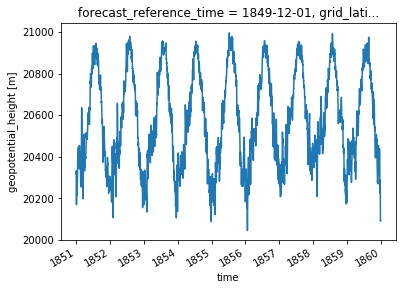

In [7]:
%%time
ds_z.geopotential_height[:, 1, 100, 100].plot()